# Lab 9: Structural break tests

### Required packages

In [16]:
library("zoo")
library("sandwich")
library("strucchange")
library("fUnitRoots")

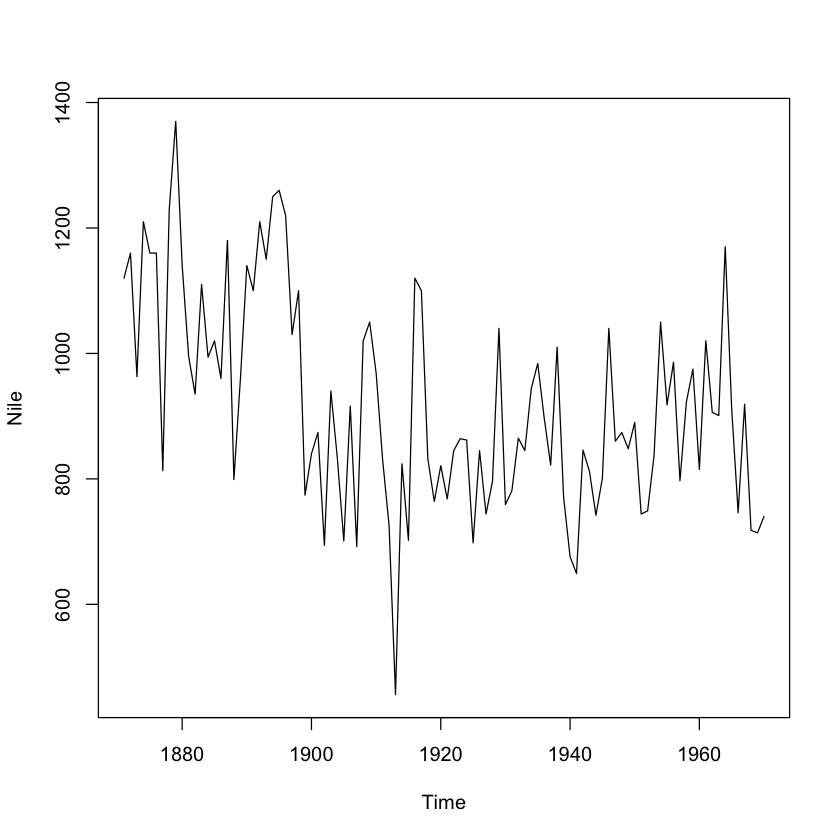

In [5]:
# Loading data
data("Nile")
plot(Nile)

#### Empirical fluctuation processes: CUSUM and MOSUM

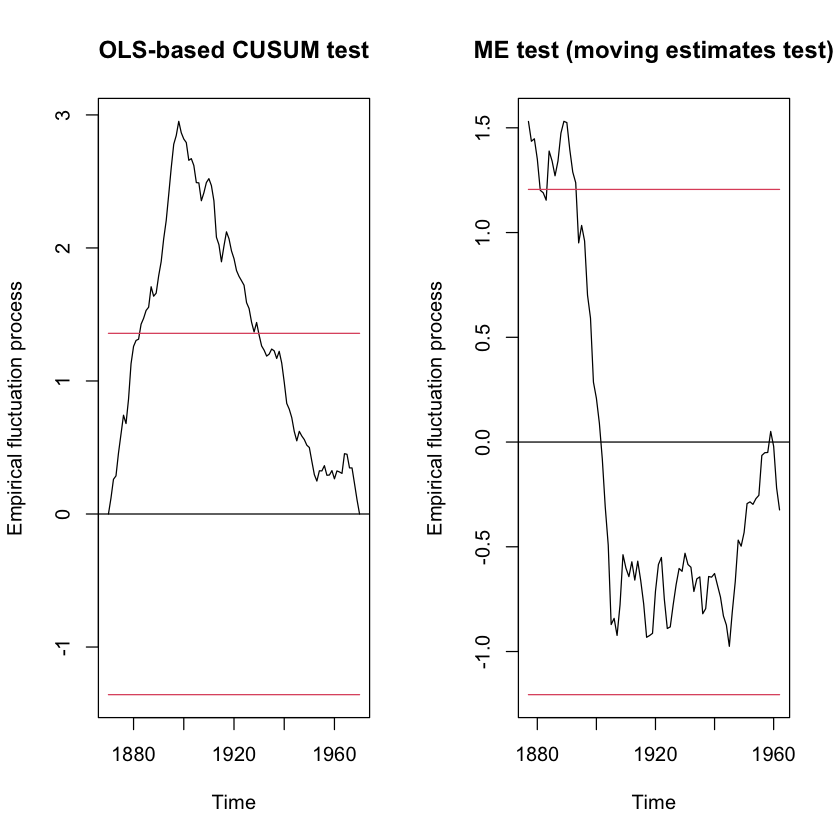

In [6]:
ocus.nile <- efp(Nile ~ 1, type = "OLS-CUSUM")
me.nile <- efp(Nile ~ 1, type = "ME")
par(mfrow=c(1,2))
plot(ocus.nile)
plot(me.nile)

#### Boundary and Significance testing


	OLS-based CUSUM test

data:  ocus.nile
S0 = 2.9518, p-value = 5.409e-08


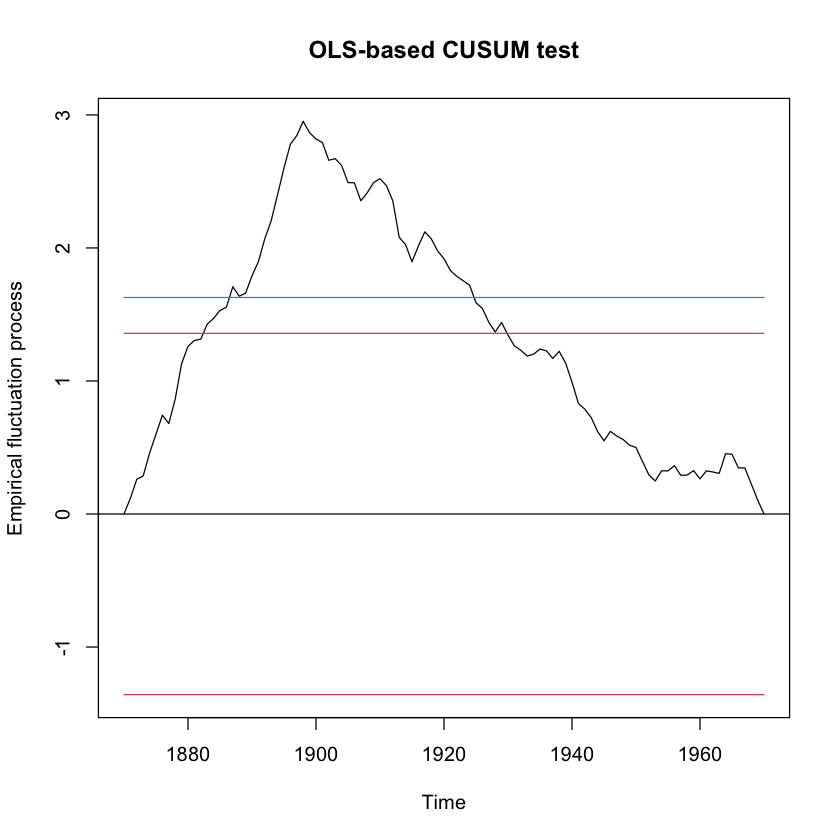

In [7]:
bound.ocus <- boundary(ocus.nile, alpha=0.01)
plot(ocus.nile, boundary = TRUE)
lines(bound.ocus, col = 4)
lines(-bound.ocus, col = 4)
sctest(ocus.nile)

#### Chow test for known structural change

In [8]:
sctest(Nile ~ 1, type = "Chow", point = 50)


	Chow test

data:  Nile ~ 1
F = 17.143, p-value = 7.348e-05


#### F tests: Computation of boundaries and plotting of F statistics


	supF test

data:  fs.nile
sup.F = 75.93, p-value = 2.22e-16



	expF test

data:  fs.nile
exp.F = 33.759, p-value < 2.2e-16


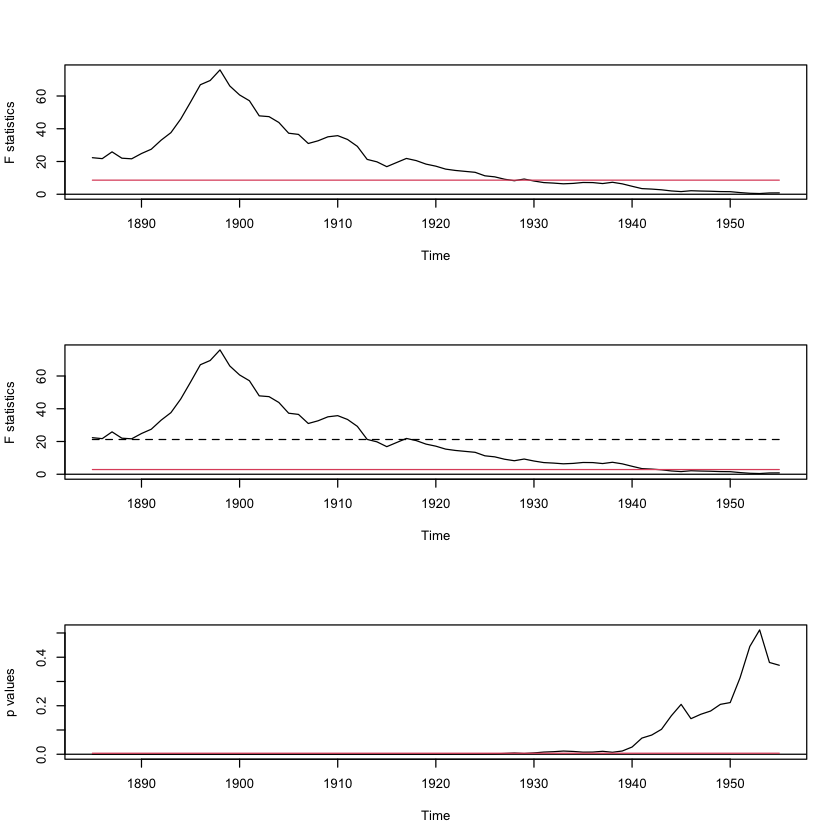

In [9]:
fs.nile <- Fstats(Nile ~ 1) 
par(mfrow=c(3,1))
plot(fs.nile)
plot(fs.nile, aveF = TRUE)
plot(fs.nile, pval = TRUE)
sctest(fs.nile)
sctest(fs.nile, type="expF") #The p values are computed based on Hansen (1997)

- Monitoring with the generalized fluctuation test
- Monitoring has only been developed for recursive and moving estimates tests
- Forward looking tests related to sequential tests
- Historical sample cut and monitoring

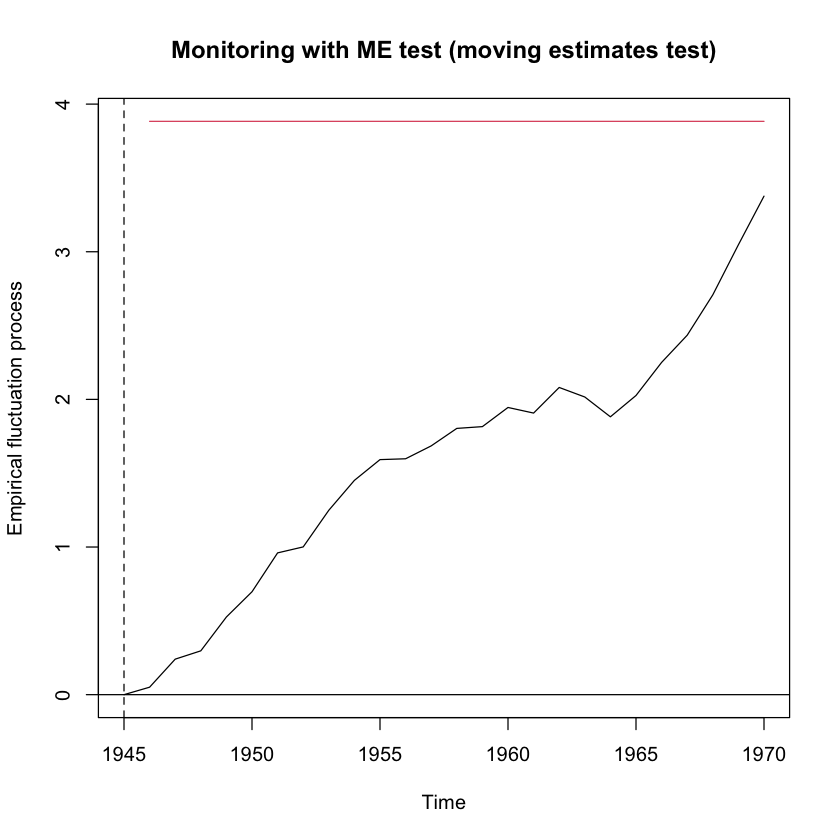

In [10]:
NileHist <- window(Nile, start = c(1871, 1), end = c(1945, 1))
me.mefp <- mefp(NileHist ~ 1, type = "ME", data = NileHist, alpha = 0.05)
NileHist <- window(Nile, start = c(1871, 1), end = c(1946, 1))
me.mefp <- monitor(me.mefp)
NileHist <- window(Nile, start = c(1871))
me.mefp <- monitor(me.mefp)
plot(me.mefp)

### Multiple Break Point Approach
- F statistics indicate one breakpoint


	 Optimal 2-segment partition: 

Call:
breakpoints.Fstats(obj = fs.nile)

Breakpoints at observation number:
28 

Corresponding to breakdates:
1898 

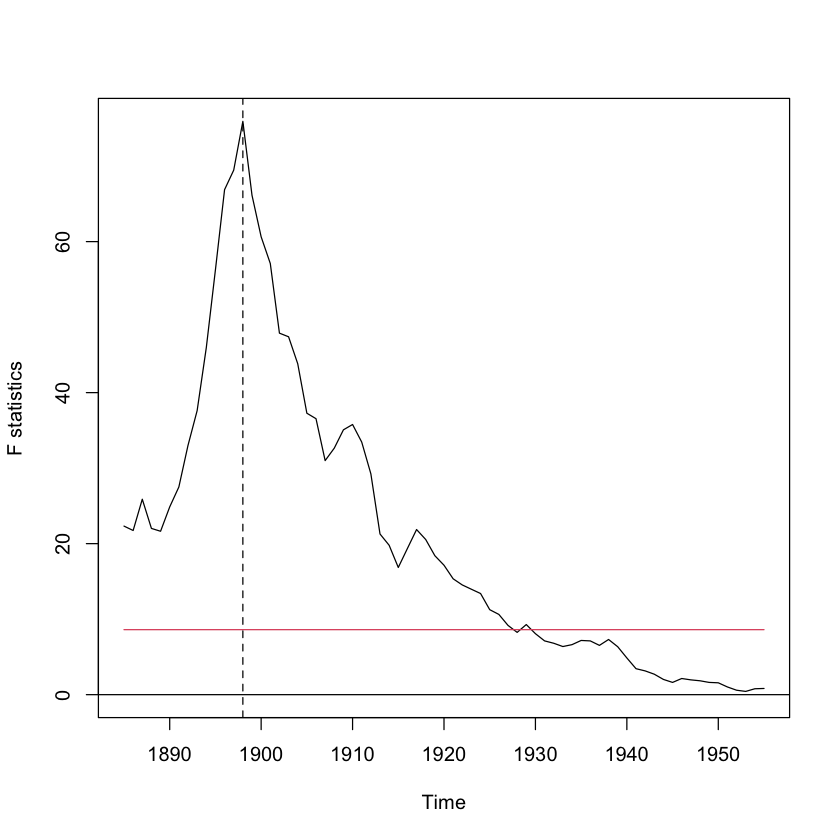

In [11]:
fs.nile <- Fstats(Nile ~ 1)
plot(fs.nile)
breakpoints(fs.nile)
lines(breakpoints(fs.nile))

Or using breakpoints()

In [12]:
bp.nile <- breakpoints(Nile ~ 1)
summary(bp.nile)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = Nile ~ 1)

Breakpoints at observation number:
                      
m = 1      28         
m = 2      28       83
m = 3      28    68 83
m = 4      28 45 68 83
m = 5   15 30 45 68 83

Corresponding to breakdates:
                                
m = 1        1898               
m = 2        1898           1953
m = 3        1898      1938 1953
m = 4        1898 1915 1938 1953
m = 5   1885 1900 1915 1938 1953

Fit:
                                                   
m   0       1       2       3       4       5      
RSS 2835157 1597457 1552924 1538097 1507888 1659994
BIC    1318    1270    1276    1285    1292    1311

#### Fit null hypothesis model and model with 1 breakpoint


	 Confidence intervals for breakpoints
	 of optimal 2-segment partition: 

Call:
confint.breakpointsfull(object = bp.nile)

Breakpoints at observation number:
  2.5 % breakpoints 97.5 %
1    25          28     32

Corresponding to breakdates:
  2.5 % breakpoints 97.5 %
1  1895        1898   1902

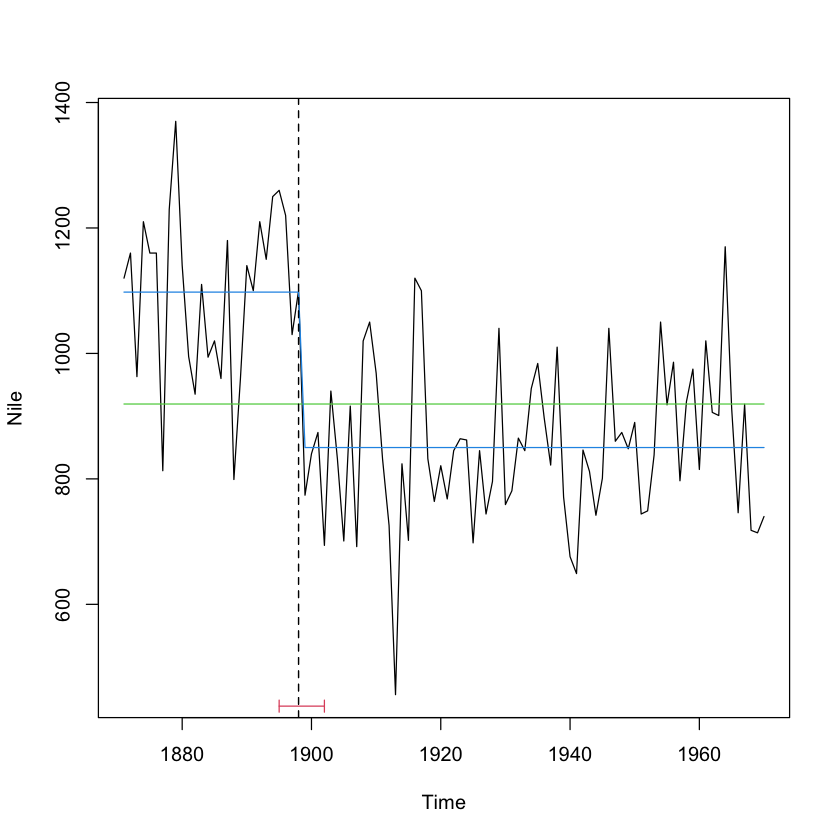

In [13]:
fm0 <- lm(Nile ~ 1)
fm1 <- lm(Nile ~ breakfactor(bp.nile, breaks = 1))
plot(Nile)
lines(ts(fitted(fm0), start = 1871), col = 3)
lines(ts(fitted(fm1), start = 1871), col = 4)
lines(bp.nile)

# Confidence interval
ci.nile <- confint(bp.nile)
ci.nile
lines(ci.nile)

#### Estimating the two segments

In [14]:
fm0.nile <- lm(Nile ~ 1)
coef(fm0.nile)
nile.fac <- breakfactor(bp.nile)
fm1.nile <- lm(Nile ~ nile.fac - 1)
coef(fm1.nile)
summary(bp.nile)

(Intercept) 
     919.35

nile.facsegment1 nile.facsegment2 
       1097.7500         849.9722


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = Nile ~ 1)

Breakpoints at observation number:
                      
m = 1      28         
m = 2      28       83
m = 3      28    68 83
m = 4      28 45 68 83
m = 5   15 30 45 68 83

Corresponding to breakdates:
                                
m = 1        1898               
m = 2        1898           1953
m = 3        1898      1938 1953
m = 4        1898 1915 1938 1953
m = 5   1885 1900 1915 1938 1953

Fit:
                                                   
m   0       1       2       3       4       5      
RSS 2835157 1597457 1552924 1538097 1507888 1659994
BIC    1318    1270    1276    1285    1292    1311

#### Andrews and Zivot (like Perron u-root test with structural change)


Title:
 Zivot & Andrews Unit Root Test

Test Results:
  NA

Description:
 Mon Oct  2 22:20:46 2023 by user: 

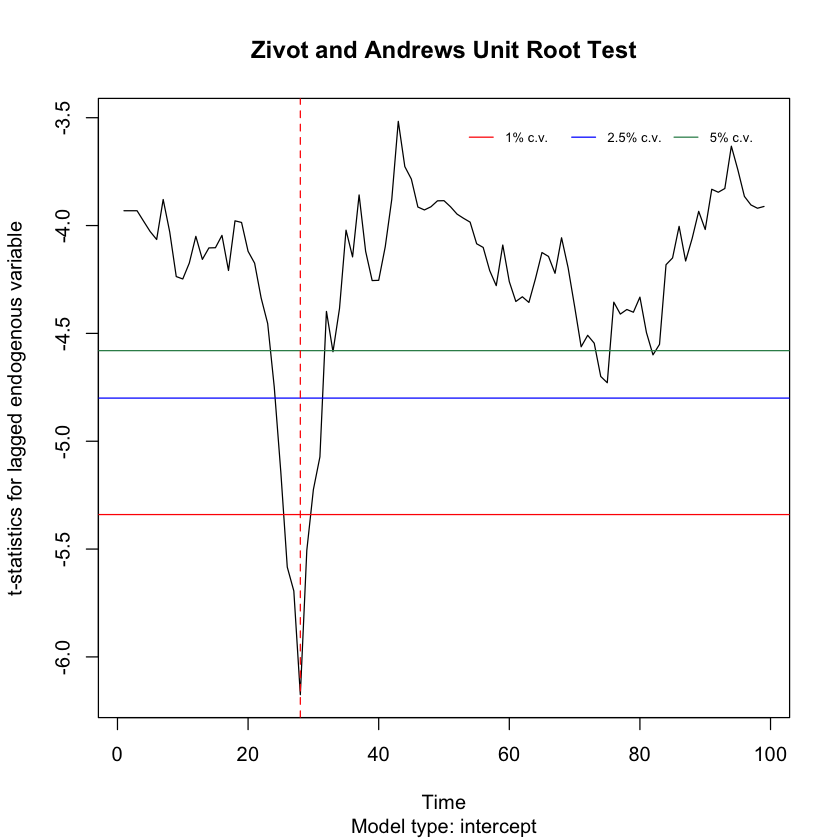

In [18]:
urzaTest(Nile, model = c("intercept"), doplot = TRUE)

### Additional resources
See:
- http://svitsrv25.epfl.ch/R-doc/library/strucchange/html/breakdates.html
- http://svitsrv25.epfl.ch/R-doc/library/strucchange/html/breakpoints.html
- Trimming of h = 0.15